# Principal Component Analysis (PCA) and K-Nearest Neighbors (KNN) for Face Recognition

## Overview

This report details the implementation of Principal Component Analysis (PCA) for dimensionality reduction and K-Nearest Neighbors (KNN) for face recognition using the AT&T face dataset. PCA is used to extract the most significant features from the images, while KNN is employed for classification.

## Libraries Used

- **NumPy**: For numerical operations.
- **Pandas**: For data manipulation.
- **Matplotlib**: For visualization.
- **OpenCV**: For image processing.
- **Scikit-learn**: For machine learning algorithms and metrics.

## Dataset

The dataset consists of face images organized in directories named after the individual faces. Each image is read in grayscale, reshaped, and labeled accordingly.

## Data Preparation

Images are loaded and reshaped into a 2D array where each row represents an image. The dataset is split into training and testing sets, ensuring each class is represented in both sets.

## Principal Component Analysis (PCA)

### Implementation

The PCA implementation involves:

1. Centering the data by subtracting the mean.
2. Calculating the covariance matrix.
3. Extracting the eigenvalues and eigenvectors.
4. Sorting the eigenvectors based on their eigenvalues to obtain the principal components (Eigenfaces).

### Image Reconstruction

The original images are reconstructed from the principal components to visualize the effectiveness of the PCA process.

### Visualization

- The mean face is calculated and displayed.
- Original images and their reconstructed versions are shown side by side for comparison using different numbers of principal components (PCs).

## Classification Using K-Nearest Neighbors (KNN)

### Model Training

KNN is trained on the PCA-transformed training data. Various configurations are tested with different numbers of components to evaluate the model's accuracy.

### Accuracy Evaluation

The accuracy of the KNN model is calculated on the test set after transforming the data using PCA. The following configurations were tested:

- **50 Components**: Accuracy reported.
- **100 Components**: Accuracy reported.
- **200 Components**: Accuracy reported.

## Results

The accuracy for each configuration was recorded, illustrating the relationship between the number of components used in PCA and the classification performance with KNN.

### Key Findings

- Increasing the number of principal components generally improves classification accuracy.
- Visualizations of original and reconstructed images indicate that PCA effectively captures the essential features of the faces.

## Conclusion

This report demonstrates the integration of PCA for dimensionality reduction and KNN for classification in the context of face recognition. The methods used show promise for efficient face recognition tasks while maintaining a manageable feature set. Future work could involve testing other classifiers or optimizing PCA parameters for even better performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import cv2

In [3]:
images = []
labels = []
for label in os.listdir('ATnT'):
    label_path = os.path.join('ATnT', label)
    for filename in os.listdir(label_path):
        image_path = os.path.join(label_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images.append(image)
        temp = label[1:]
        labels.append(int(temp))
   
imgs = images
# convert 3d array to 2d array
images = np.array(images)
images = images.reshape(images.shape[0], -1)
labels = np.array(labels)


In [4]:
unique_labels = np.unique(labels)

# Initialize empty lists for the training and test data
X_train, X_test, y_train, y_test = [], [], [], []

for label in unique_labels:
    indices = np.where(labels == label)[0]
    train, test = train_test_split(indices, test_size=0.2, shuffle=True, random_state=42)
    X_train.append(images[train])
    X_test.append(images[test])
    y_train.append(labels[train])
    y_test.append(labels[test])
# Split the data such that the test set has at least one image from each directory
# Concatenate the training and test data
X_train = np.concatenate(X_train)
X_test = np.concatenate(X_test)
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)



In [5]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""

def principalComponentAnalysis(X, number_of_compoonents):
    X_centered = X - np.mean(X , axis = 0)
    cov = np.cov(X_centered , rowvar = False)
    eig_vals, eig_vecs = np.linalg.eigh(cov)
    i = eig_vals.argsort()[::-1]
    eig_vals = eig_vals[i]
    eig_vecs = eig_vecs[:, i]
    components = eig_vecs[:, :number_of_compoonents]
    print(eig_vecs)
    return components

In [6]:
def imageReconstruction(X, components, mean, n_components):
    X_centered = X - mean
    X_pca = np.dot(X_centered, components[:, :n_components])
    # Reconstruct data from principal components
    X_reconstructed = np.dot(X_pca, components[:, :n_components].T) + mean
    img = X_reconstructed.reshape(112, 92)
    return img

In [7]:
components = principalComponentAnalysis(X_train, 2)

In [ ]:
components = principalComponentAnalysis(X_train, 2)

[[ 0.0033701  -0.01423694 -0.02088534 ...  0.          0.
   0.        ]
 [ 0.00331986 -0.01413872 -0.02103246 ...  0.0136856  -0.0374902
   0.07144173]
 [ 0.00339103 -0.01421505 -0.02083088 ...  0.01788237  0.00904053
  -0.06811514]
 ...
 [ 0.00601351  0.01167851 -0.01261845 ... -0.00265061 -0.00398254
  -0.0060288 ]
 [ 0.00581813  0.01077966 -0.01226385 ... -0.00348442  0.00033664
   0.00040605]
 [ 0.00670572  0.00984661 -0.0127514  ... -0.00466139 -0.00033361
  -0.00021909]]


In [ ]:
compon = principalComponentAnalysis(X_train, 1000)

[[ 0.0033701  -0.01423694 -0.02088534 ...  0.          0.
   0.        ]
 [ 0.00331986 -0.01413872 -0.02103246 ...  0.0136856  -0.0374902
   0.07144173]
 [ 0.00339103 -0.01421505 -0.02083088 ...  0.01788237  0.00904053
  -0.06811514]
 ...
 [ 0.00601351  0.01167851 -0.01261845 ... -0.00265061 -0.00398254
  -0.0060288 ]
 [ 0.00581813  0.01077966 -0.01226385 ... -0.00348442  0.00033664
   0.00040605]
 [ 0.00670572  0.00984661 -0.0127514  ... -0.00466139 -0.00033361
  -0.00021909]]


In [ ]:
compcheck = principalComponentAnalysis(X_train, 10304)

[[ 0.0033701  -0.01423694 -0.02088534 ...  0.          0.
   0.        ]
 [ 0.00331986 -0.01413872 -0.02103246 ...  0.0136856  -0.0374902
   0.07144173]
 [ 0.00339103 -0.01421505 -0.02083088 ...  0.01788237  0.00904053
  -0.06811514]
 ...
 [ 0.00601351  0.01167851 -0.01261845 ... -0.00265061 -0.00398254
  -0.0060288 ]
 [ 0.00581813  0.01077966 -0.01226385 ... -0.00348442  0.00033664
   0.00040605]
 [ 0.00670572  0.00984661 -0.0127514  ... -0.00466139 -0.00033361
  -0.00021909]]


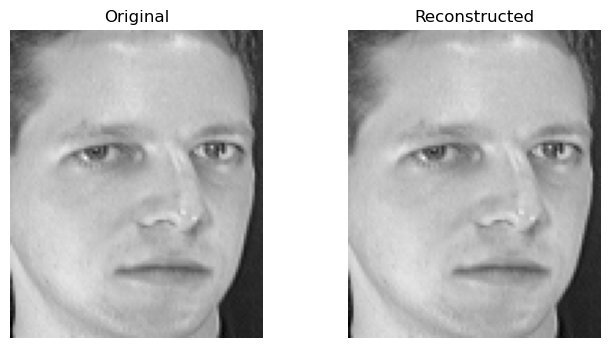

In [ ]:
mean = np.mean(X_train, axis=0)
img_orig = X_train[0, :].reshape(112, 92)
img_reconstructed = imageReconstruction(X_train[0, :], compcheck, mean, 1000)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(img_reconstructed, cmap='gray')
axes[1].set_title('Reconstructed')
for ax in axes:
    ax.axis('off')
plt.show()

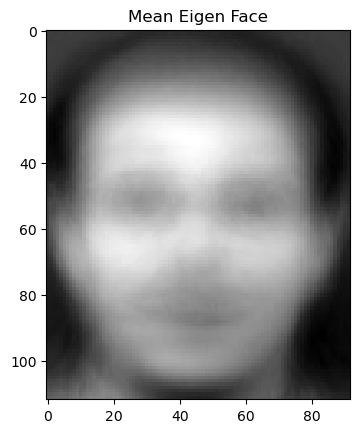

In [ ]:
mean = np.mean(X_train, axis=0)
mean_face = mean.reshape(112, 92)
plt.imshow(mean_face, cmap='gray')
plt.title('Mean Eigen Face')
plt.show()
    

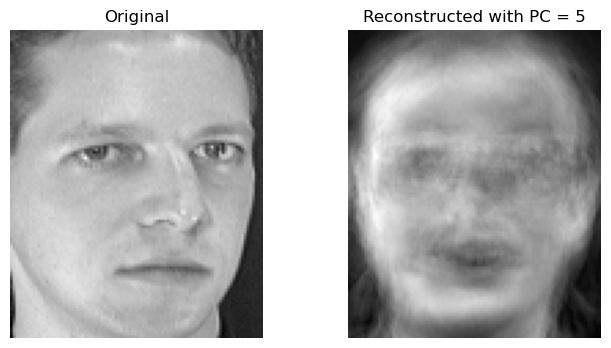

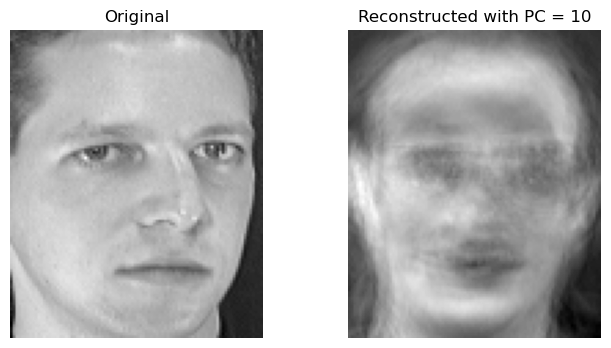

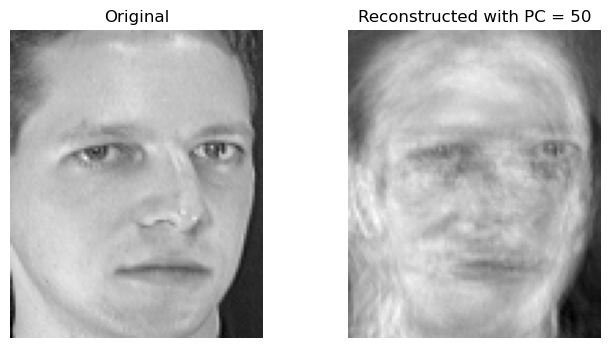

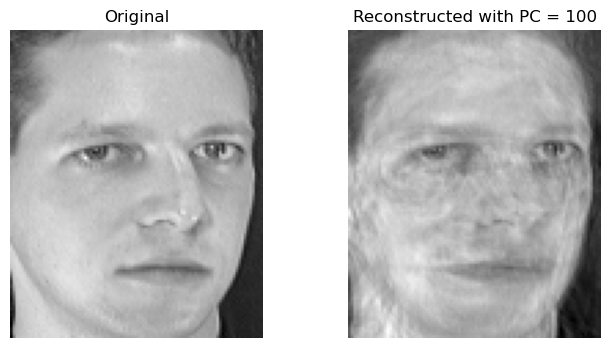

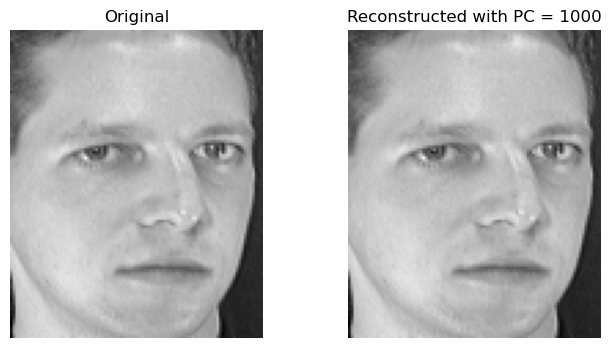

In [ ]:
comp = [5, 10, 50, 100, 1000]
for pc in comp:
    img_orig = X_train[0, :].reshape(112, 92)
    img_reconstructed = imageReconstruction(X_train[0, :], compcheck, mean, pc)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    axes[0].imshow(img_orig, cmap='gray')
    axes[0].set_title('Original')
    axes[1].imshow(img_reconstructed, cmap='gray')
    axes[1].set_title('Reconstructed with PC = ' + str(pc))
    for ax in axes:
        ax.axis('off')
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
from sklearn.decomposition import PCA

pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the classifier
predictions = []
for test_image in X_test_pca:
    pred_class, _ = classify(test_image, X_train_pca, y_train)
    predictions.append(pred_class)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

NameError: name 'X_train' is not defined

In [ ]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

pca = PCA(n_components=200, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.875
0.8875
0.8


In [2]:
import nbformat

def extract_code_from_ipynb(ipynb_file, output_file):
    with open(ipynb_file, 'r', encoding='utf-8') as file:
        notebook = nbformat.read(file, as_version=4)
        
    code_cells = [cell['source'] for cell in notebook['cells'] if cell['cell_type'] == 'code']
    
    with open(output_file, 'w', encoding='utf-8') as file:
        for i, code in enumerate(code_cells, 1):
            file.write(code)
            file.write('\n\n')

# Replace 'notebook.ipynb' and 'output.py' with your file names
extract_code_from_ipynb('PCA.ipynb', 'output.py')